# Exploratory Data Analysis

## 1. Analysis
    1. Univariate Analysis
    2. Multivariate Analysis

## 2. Feature Engineering
    1. Creating new Columns
    2. Modifying existing ones
    
## 3. Handling Outliers
    1. Detect Outliers
    2. Remove Outliers


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#importing the dataset
df = pd.read_csv('Titanic_DataSet.csv')

In [3]:
# Shape
df.shape

(891, 12)

In [4]:
# Previewing the Data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Listing down the columns
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

# Categorical Columns:
- Survived
- Pclass
- Sex
- SibSp
- Parch
- Embarked

# Numerical Columns:
- Age
- Fare
- Passengerid

# Mixed Columns:
- Name
- Ticket
- Cabin

In [6]:
# data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Missing Values:
- 177 missing values in Age Column
- 687 missing values in Cabin Column
- 2 missing values in Embarked Column

# Data Type:
- Survived should not be int value, it should be category data
- Pclass should not be int value, it should be category data
- Sex should not be object value, it should be category data
- Age should not be float value, it should be int data
- Embarked should not be object value, it should be category data

In [7]:
# Missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Few Conclusions:

## 1. Missing values in Age, Cabin, and Embarked columns
## 2. Approximately 77 percent values are missing in Cabin column, so will have to drop
## 3. Few columns have inappropriate data types

In [8]:
# Dropping Cabin column
df.drop(columns=['Cabin'],inplace=True)

In [9]:
# Imputing missing values for age
# Strategy - Mean of age
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [10]:
# Imputing missing values for embarked
# Find the most appeared value in embarked column
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [11]:
# "S" appeared the most
df['Embarked'].fillna('S', inplace=True)

In [12]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [13]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

# Changing data type for the following columns
- Survived -> Category
- Pclass -> Category
- Sex -> Category
- Age -> int
- Embarked -> Category

In [14]:
df['Survived'] = df['Survived'].astype('category')
df['Pclass'] = df['Pclass'].astype('category')
df['Sex'] = df['Sex'].astype('category')
df['Age'] = df['Age'].astype('int')
df['Embarked'] = df['Embarked'].astype('category')

In [15]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null category
Pclass         891 non-null category
Name           891 non-null object
Sex            891 non-null category
Age            891 non-null int32
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null category
dtypes: category(4), float64(1), int32(1), int64(3), object(2)
memory usage: 49.2+ KB


In [17]:
# 5-point Summary
df.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.544332,0.523008,0.381594,32.204208
std,257.353842,13.013778,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,35.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


# univariate Analysis

Out of 891 62.0% people died in the accident


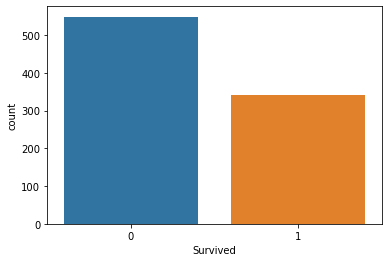

In [18]:
# Survived Column

sns.countplot(df['Survived'])
Survived_count = sns.countplot(df['Survived'])

Survived_fig = Survived_count.get_figure()
Survived_fig.savefig('Survived_count.png')


death_percent = round((df['Survived'].value_counts().values[0]/891)*100)
print('Out of 891 {}% people died in the accident'.format(death_percent))

3    55.0
1    24.0
2    21.0
Name: Pclass, dtype: float64
3    491
1    216
2    184
Name: Pclass, dtype: int64


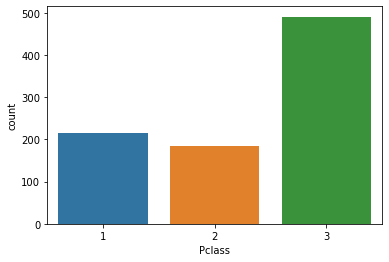

In [19]:
# Pclass Column

sns.countplot(df['Pclass'])


Pclass_count = sns.countplot(df['Pclass'])

Survived_fig = Pclass_count.get_figure()
Survived_fig.savefig('Pclass_count.png')


pclass_percent = round((df['Pclass'].value_counts()/891)*100)
pclass_count = df['Pclass'].value_counts()
print(pclass_percent)
print(pclass_count)

male      65.0
female    35.0
Name: Sex, dtype: float64
male      577
female    314
Name: Sex, dtype: int64


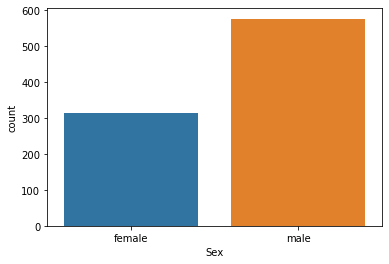

In [20]:
# Sex column

sns.countplot(df['Sex'])

Sex_count = sns.countplot(df['Sex'])
_fig = Sex_count.get_figure()
_fig.savefig('Sex_count.png')


sex_percent = round((df['Sex'].value_counts()/891)*100)
sex_count = df['Sex'].value_counts()
print(sex_percent)
print(sex_count)

0    68.0
1    23.0
2     3.0
4     2.0
3     2.0
8     1.0
5     1.0
Name: SibSp, dtype: float64
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


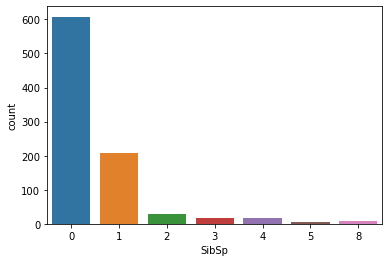

In [21]:
# SibSp column

sns.countplot(df['SibSp'])

SibSp_count = sns.countplot(df['SibSp'])
_fig = SibSp_count.get_figure()
_fig.savefig('SibSp_count.png')

sibsp_percent = round((df['SibSp'].value_counts()/891)*100)
sibsp_count = df['SibSp'].value_counts()
print(sibsp_percent)
print(sibsp_count)

0    76.0
1    13.0
2     9.0
5     1.0
3     1.0
4     0.0
6     0.0
Name: Parch, dtype: float64
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


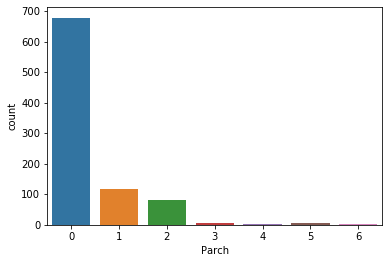

In [22]:
# Parch column

sns.countplot(df['Parch'])

Parch_count = sns.countplot(df['Parch'])
_fig = Parch_count.get_figure()
_fig.savefig('Parch_count.png')


parch_percent = round((df['Parch'].value_counts()/891)*100)
parch_count = df['Parch'].value_counts()
print(parch_percent)
print(parch_count)

S    73.0
C    19.0
Q     9.0
Name: Embarked, dtype: float64
S    646
C    168
Q     77
Name: Embarked, dtype: int64


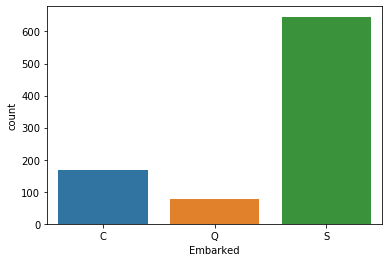

In [23]:
# Embarked column

sns.countplot(df['Embarked'])

Embarked_count = sns.countplot(df['Embarked'])
_fig = Embarked_count.get_figure()
_fig.savefig('Embarked_count.png')


embarked_percent = round((df['Embarked'].value_counts()/891)*100)
embarked_count = df['Embarked'].value_counts()
print(embarked_percent)
print(embarked_count)

0.45956263424701577
0.9865867453652877


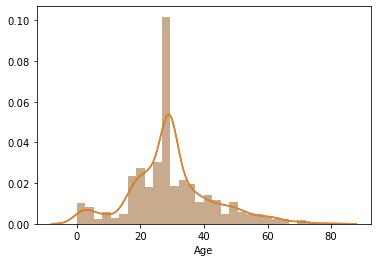

In [24]:
# Age column

sns.distplot(df['Age'])

Age_distribution = sns.distplot(df['Age'])
_fig = Age_distribution.get_figure()
_fig.savefig('Age_distribution.png')


print(df['Age'].skew())
print(df['Age'].kurt())

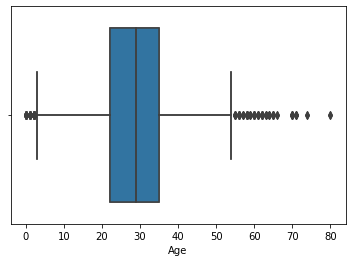

In [25]:
sns.boxplot(df['Age'])

Age_boxplot = sns.boxplot(df['Age'])
_fig = Age_boxplot.get_figure()
_fig.savefig('Age_boxplot.png')

In [26]:
print('Passengers with age in between 60 and 70 are: ', df[(df['Age']>60) & (df['Age']<70)].shape[0])
print('Passengers with age greater than 70 and 75 are: ', df[(df['Age']>70) & (df['Age']<=75)].shape[0])
print('Passengers with age greater than 75 are: ', df[(df['Age']>75)].shape[0])

Passengers with age in between 60 and 70 are:  15
Passengers with age greater than 70 and 75 are:  3
Passengers with age greater than 75 are:  1


In [27]:
print('Passengers with age less than 1 are: ', df[(df['Age']<1)].shape[0])

Passengers with age less than 1 are:  7


# Conclusion
- For all practical purposes age can be considered as normal distribution
- Deeper analysis is required for outlier detection

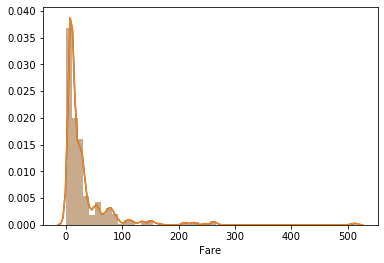

In [28]:
# Fare column

sns.distplot(df['Fare'])

Fare_distribution = sns.distplot(df['Fare'])
_fig = Fare_distribution.get_figure()
_fig.savefig('Fare_distribution.png')

In [29]:
print(df['Fare'].skew())
print(df['Fare'].kurt())

4.787316519674893
33.39814088089868


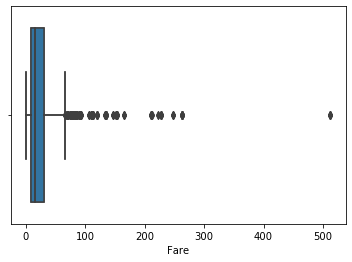

In [30]:
sns.boxplot(df['Fare'])

Fare_boxplot = sns.boxplot(df['Fare'])
_fig = Fare_boxplot.get_figure()
_fig.savefig('Fare_boxplot.png')

In [31]:
print('Passengers with Fare in between $200 and $300 are: ', df[(df['Fare']>200) & (df['Fare']<300)].shape[0])
print('Passengers with Fare greater than $300 are: ', df[(df['Fare']>300)].shape[0])

Passengers with Fare in between $200 and $300 are:  17
Passengers with Fare greater than $300 are:  3


# Conclusion

- Highly skewed data, a lot of passengers had cheaper tickets
- outliers are there in the data

# Multivariate Analysis

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119
------------------------------
Survived     0     1
Pclass              
1         37.0  63.0
2         52.7  47.3
3         75.8  24.2


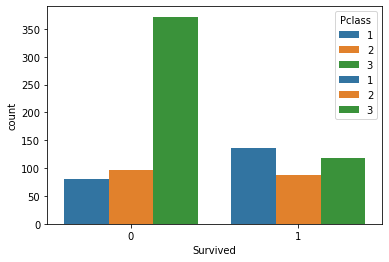

In [32]:
# Survival with Pclass

sns.countplot(df['Survived'], hue= df['Pclass'])

Survive_Pclass_count = sns.countplot(df['Survived'], hue= df['Pclass'])
_fig = Survive_Pclass_count.get_figure()
_fig.savefig('Survive_Pclass_count.png')


print(pd.crosstab(df['Pclass'], df['Survived']))
print('-'*30)
print(pd.crosstab(df['Pclass'], df['Survived']).apply(lambda r: round((r/r.sum())*100,1),axis=1))

Survived    0    1
Sex               
female     81  233
male      468  109
------------------------------
Survived     0     1
Sex                 
female    25.8  74.2
male      81.1  18.9


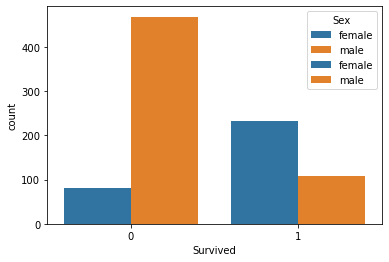

In [33]:
# Survival with Sex

sns.countplot(df['Survived'], hue= df['Sex'])

Survive_Sex_count = sns.countplot(df['Survived'], hue= df['Sex'])
_fig = Survive_Sex_count.get_figure()
_fig.savefig('Survive_Sex_count.png')


print(pd.crosstab(df['Sex'], df['Survived']))
print('-'*30)
print(pd.crosstab(df['Sex'], df['Survived']).apply(lambda r: round((r/r.sum())*100,1),axis=1))

Survived    0    1
Embarked          
C          75   93
Q          47   30
S         427  219
------------------------------
Survived     0     1
Embarked            
C         44.6  55.4
Q         61.0  39.0
S         66.1  33.9


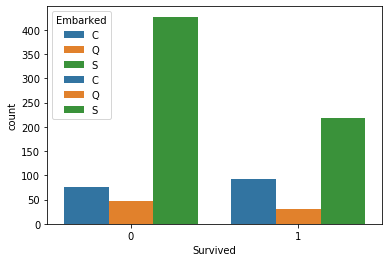

In [34]:
# Survival with Embarked

sns.countplot(df['Survived'], hue= df['Embarked'])

Survive_Embarked_count = sns.countplot(df['Survived'], hue= df['Embarked'])
_fig = Survive_Embarked_count.get_figure()
_fig.savefig('Survive_Embarked_count.png')


print(pd.crosstab(df['Embarked'], df['Survived']))
print('-'*30)
print(pd.crosstab(df['Embarked'], df['Survived']).apply(lambda r: round((r/r.sum())*100,1),axis=1))

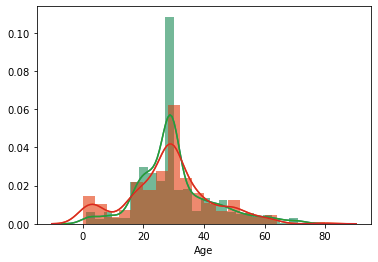

In [35]:
# Survival with Age

sns.distplot(df[df['Survived']==0]['Age'])
sns.distplot(df[df['Survived']==1]['Age'])

Died_Age_distribution = sns.distplot(df[df['Survived']==0]['Age'])
_fig = Died_Age_distribution.get_figure()
_fig.savefig('Died_Age_distribution.png')

Survived_Age_distribution = sns.distplot(df[df['Survived']==1]['Age'])
_fig = Survived_Age_distribution.get_figure()
_fig.savefig('Survived_Age_distribution.png')


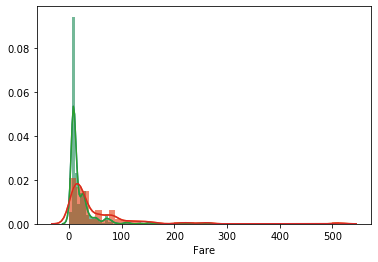

In [36]:
# Survival with Fare

sns.distplot(df[df['Survived']==0]['Fare'])
sns.distplot(df[df['Survived']==1]['Fare'])

Died_Fare_distribution = sns.distplot(df[df['Survived']==0]['Fare'])
_fig = Died_Fare_distribution.get_figure()
_fig.savefig('Died_Fare_distribution.png')

Survived_Fare_distribution = sns.distplot(df[df['Survived']==1]['Fare'])
_fig = Survived_Fare_distribution.get_figure()
_fig.savefig('Survived_Fare_distribution.png')

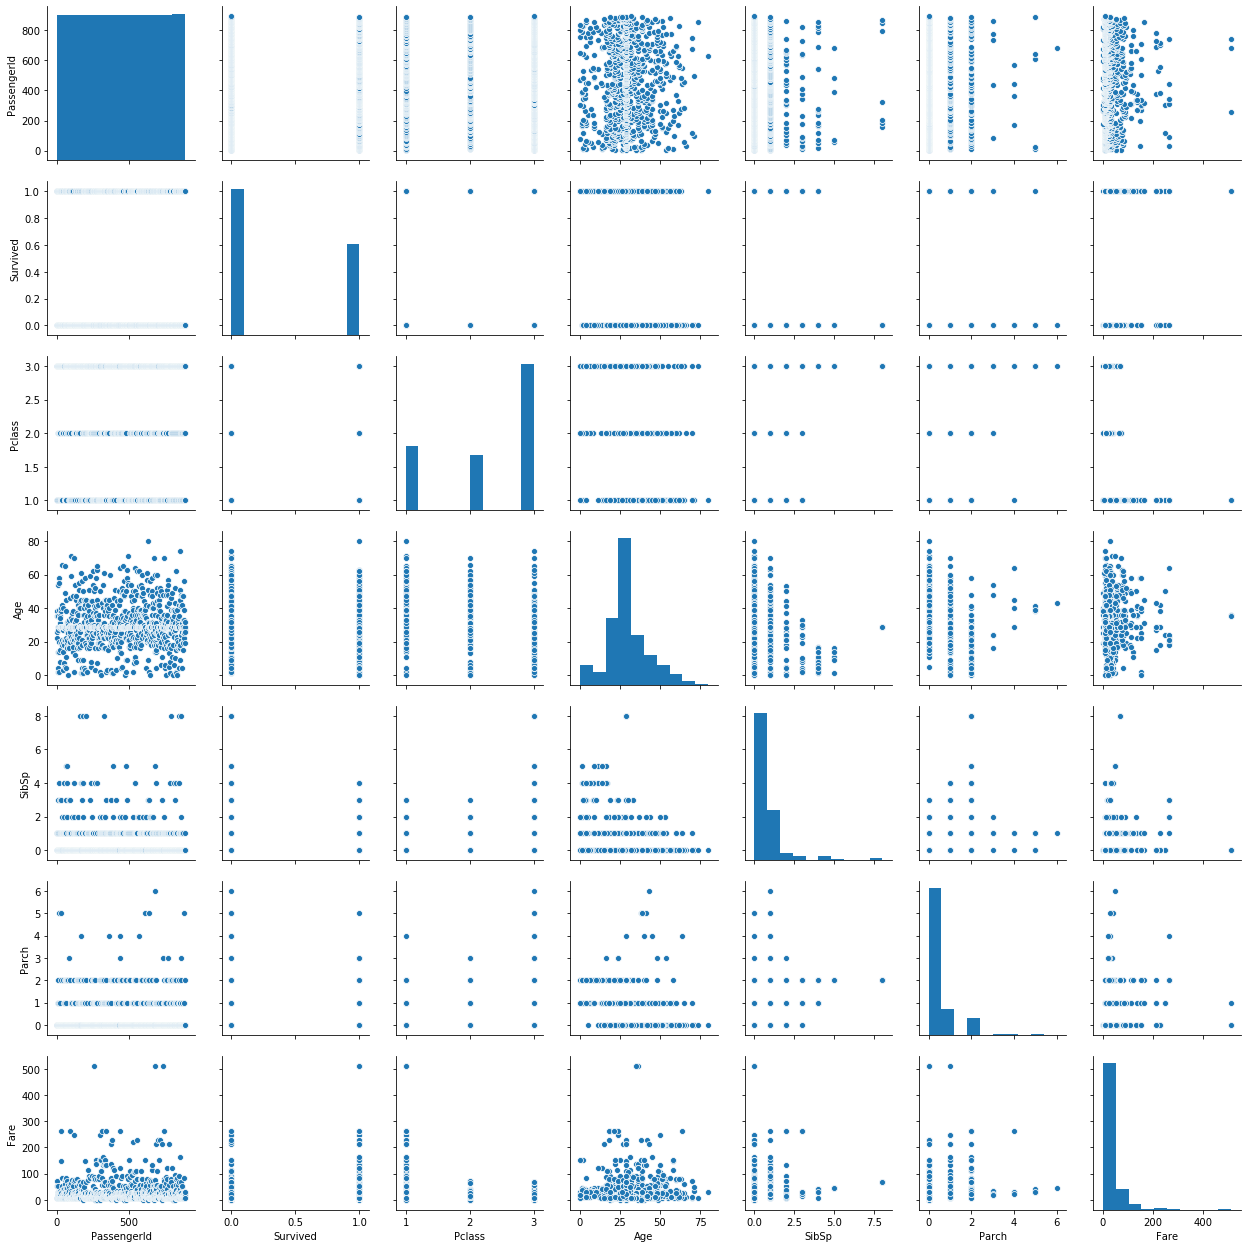

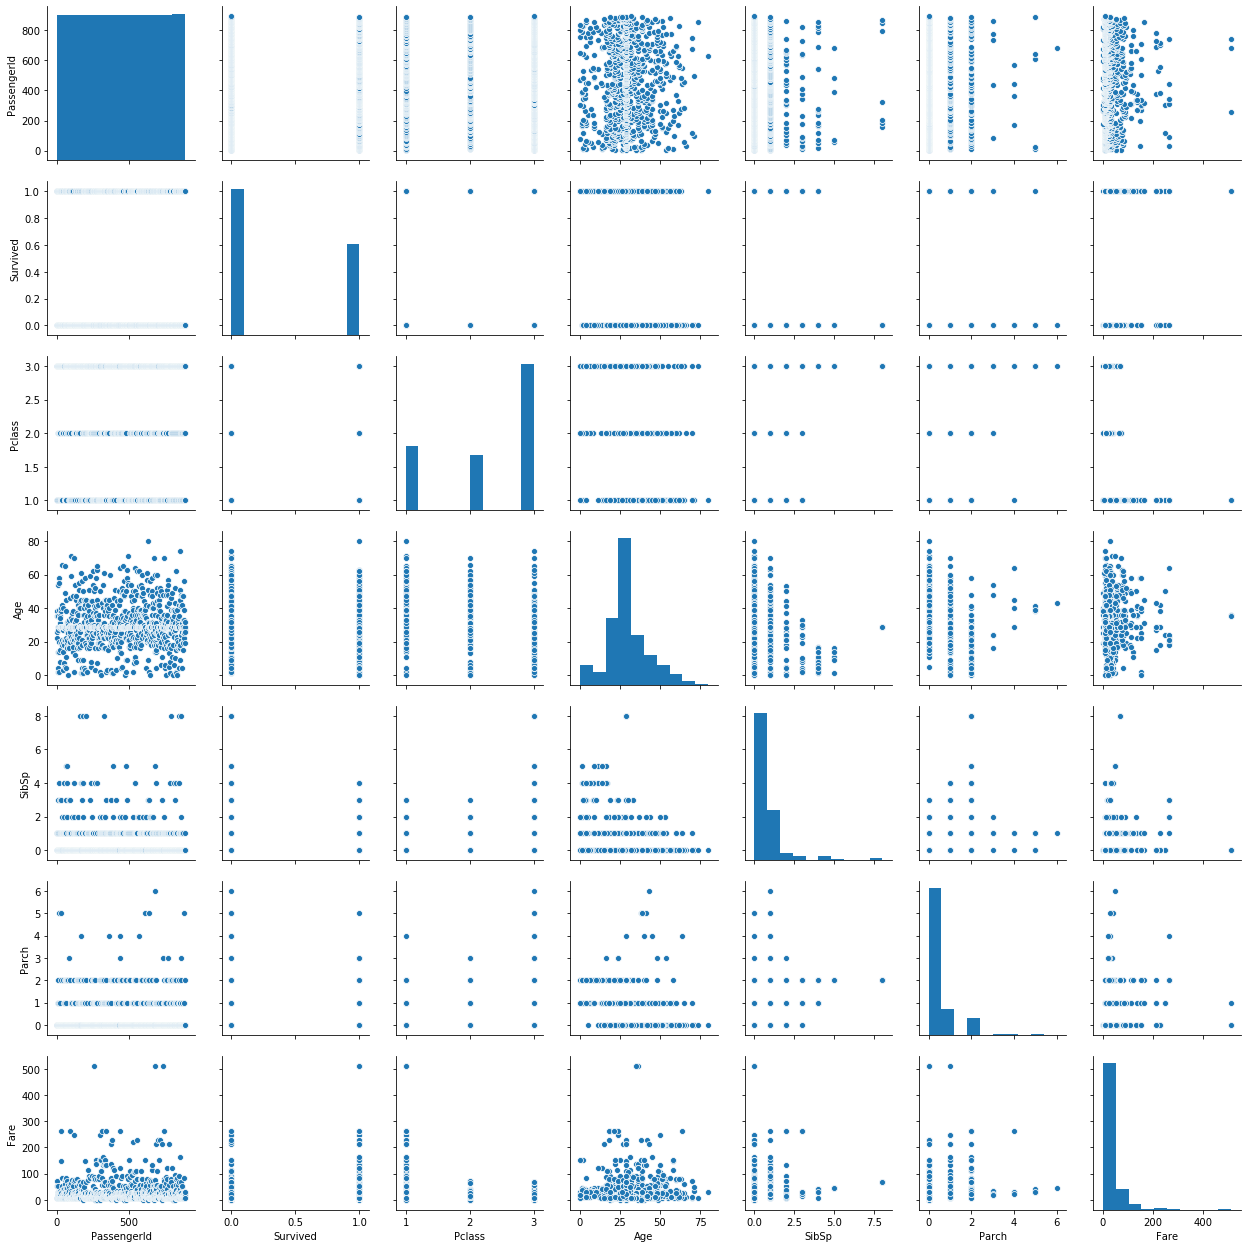

In [37]:
sns.pairplot(df)


titanic_dataset_pairplot = sns.pairplot(df)
titanic_dataset_pairplot.savefig('titanic_dataset_pairplot.png')
#_fig = titanic_dataset_pairplot.get_figure()
#_fig.savefig('titanic_dataset_pairplot.png')

In [38]:
df.corr()

,PassengerId,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.033741,-0.057527,-0.001652,0.012658
Age,0.033741,1.000000,-0.232743,-0.176744,0.093856
SibSp,-0.057527,-0.232743,1.000000,0.414838,0.159651
Parch,-0.001652,-0.176744,0.414838,1.000000,0.216225
Fare,0.012658,0.093856,0.159651,0.216225,1.000000


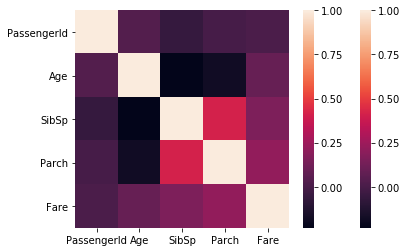

In [39]:
sns.heatmap(df.corr())


titanic_dataset_correlation_heatmap = sns.heatmap(df.corr())
_fig = titanic_dataset_correlation_heatmap.get_figure()
_fig.savefig('titanic_dataset_correlation_heatmap.png')

# Feature Engineering

In [40]:
# We will create a new column by thee name of family which will be the sum of SibSp and Parch columns
df['FamilySize'] = df['Parch']+df['SibSp']

In [41]:
df.shape

(891, 12)

In [42]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,0


In [43]:
# now depending upon the family size we will segerate it categorically

def fam_type(num):
    if num==0:
        return "Alone"
    elif num>0 and num<=4:
        return "Medium"
    else:
        return "Large"

In [44]:
df['FamilyType'] = df['FamilySize'].apply(fam_type)

In [45]:
df.shape

(891, 13)

In [46]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,FamilyType
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,1,Medium
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,1,Medium
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,0,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,1,Medium
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,0,Alone


In [47]:
# we do not need columns SibSp, Parch and FamilySize any more. So, drop them

df.drop(columns=['SibSp', 'Parch', 'FamilySize'], inplace=True)

In [48]:
df.shape

(891, 10)

In [49]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,FamilyType
0,1,0,3,"Braund, Mr. Owen Harris",male,22,A/5 21171,7.2500,S,Medium
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,PC 17599,71.2833,C,Medium
2,3,1,3,"Heikkinen, Miss. Laina",female,26,STON/O2. 3101282,7.9250,S,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,113803,53.1000,S,Medium
4,5,0,3,"Allen, Mr. William Henry",male,35,373450,8.0500,S,Alone


In [50]:
print(pd.crosstab(df['FamilyType'], df['Survived']))
print('-'*30)
print(pd.crosstab(df['FamilyType'], df['Survived']).apply(lambda r: round((r/r.sum())*100,1),axis=1))

Survived      0    1
FamilyType          
Alone       374  163
Large        40    7
Medium      135  172
------------------------------
Survived       0     1
FamilyType            
Alone       69.6  30.4
Large       85.1  14.9
Medium      44.0  56.0


# Detecting Outliers

### Numerical Data

- If the data is following normal distribution, anything beyond 3SD - mean + 3SD can be considered as an outlier
- If the data does not follow normal distribution, using boxplot we can eliminate points beyond Q1 - 1.5*IQR  and  Q3 + 1.5*IQR

### Categorical Data

- If the column is highly imbalanced, for example male: 10,000 and female: 2. Then we can say eliminate female

In [51]:
# Handling outliers in Age (Almost normal)

df = df[df['Age']<df['Age'].mean() + 3*df['Age'].std()]
df.shape

(884, 10)

In [52]:
# Handling outliers from Fare column

# Find Quartile
Q1 = np.percentile(df['Fare'],25)
Q3 = np.percentile(df['Fare'],75)

outlier_low = Q1 - 1.5*(Q3-Q1)
outlier_high = Q3 + 1.5*(Q3-Q1)

df = df[(df['Fare']>outlier_low) & (df['Fare']<outlier_high)]
df.shape

(769, 10)

In [53]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,FamilyType
0,1,0,3,"Braund, Mr. Owen Harris",male,22,A/5 21171,7.2500,S,Medium
2,3,1,3,"Heikkinen, Miss. Laina",female,26,STON/O2. 3101282,7.9250,S,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,113803,53.1000,S,Medium
4,5,0,3,"Allen, Mr. William Henry",male,35,373450,8.0500,S,Alone
5,6,0,3,"Moran, Mr. James",male,29,330877,8.4583,Q,Alone


In [54]:
'''
Here we can make the data into dummy data which are not in the form of 0 and 1. like "Sex", 
although it is only male and female but it is not 0 and 1, 
similarly Pclass is 1,2 and 3 so need dummy column.
'''

DF=pd.get_dummies(data=df, columns=['Pclass', 'Sex', 'Embarked', 'FamilyType'])

In [55]:
DF.head()

,PassengerId,Survived,Name,Age,Ticket,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,FamilyType_Alone,FamilyType_Large,FamilyType_Medium
0,1,0,"Braund, Mr. Owen Harris",22,A/5 21171,7.2500,0,0,1,0,1,0,0,1,0,0,1
2,3,1,"Heikkinen, Miss. Laina",26,STON/O2. 3101282,7.9250,0,0,1,1,0,0,0,1,1,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,113803,53.1000,1,0,0,1,0,0,0,1,0,0,1
4,5,0,"Allen, Mr. William Henry",35,373450,8.0500,0,0,1,0,1,0,0,1,1,0,0
5,6,0,"Moran, Mr. James",29,330877,8.4583,0,0,1,0,1,0,1,0,1,0,0


In [56]:
# we can also write the above code as:

d_f=pd.get_dummies(data=df, columns=['Pclass', 'Sex', 'Embarked', 'FamilyType'], drop_first=True)

In [57]:
d_f.head()

,PassengerId,Survived,Name,Age,Ticket,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,FamilyType_Large,FamilyType_Medium
0,1,0,"Braund, Mr. Owen Harris",22,A/5 21171,7.2500,0,1,1,0,1,0,1
2,3,1,"Heikkinen, Miss. Laina",26,STON/O2. 3101282,7.9250,0,1,0,0,1,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,113803,53.1000,0,0,0,0,1,0,1
4,5,0,"Allen, Mr. William Henry",35,373450,8.0500,0,1,1,0,1,0,0
5,6,0,"Moran, Mr. James",29,330877,8.4583,0,1,1,1,0,0,0


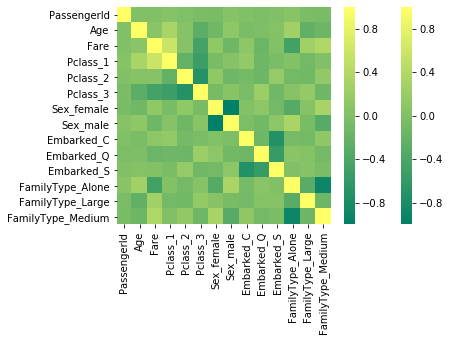

In [58]:
sns.heatmap(DF.corr(), cmap='summer')


titanic_dataset_without_outliers_correlation_heatmap = sns.heatmap(DF.corr(), cmap='summer')
_fig = titanic_dataset_without_outliers_correlation_heatmap.get_figure()
_fig.savefig('titanic_dataset_without_outliers_correlation_heatmap.png')

# Drawing Conclusions:

- Chances of female survival is higher than male survival
- Travelling in Passenger Class 3 was deadliest
- Somehow, Passednger embarking from Cherbourg survived more when compared with Southampton and Queenstown
- Passenger in the age range of 20 to 40 had higher chance of not surviving
- Passenger travelling with small families had a higher chance of surviving the accident in comparision to passenger with large families and passenger travelling alone